# Energy consumption of top 100 crypto

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
mineable_100 = pd.read_csv('data/mineable_100.csv')
mineable_100 = mineable_100.set_index('Name')

## Lower hardware bound

In [4]:
found_data = mineable_100[~mineable_100.isnull().any(axis=1)].copy()
found_data

,#,market_cap,price,tag,algorithm,block_time,difficulty,nethash_scraped,block_reward,exchange_rate,exchange_rate_curr
Name,,,,,,,,,,,
bitcoin,1,"$96,857,634,339","$5,300.20",BTC,SHA-256,787.0000,1.655292e+13,9.033579e+19,13.087200,5.246430e+03,BTC
ethereum,2,"$12,862,918,727",$116.80,ETH,Ethash,13.3475,2.084378e+15,1.561625e+14,2.000000,2.206945e-02,BTC
litecoin,4,"$2,232,848,115",$34.72,LTC,Scrypt,156.0000,5.152158e+06,1.418484e+14,12.500000,6.562300e-03,BTC
bitcoinsv,5,"$2,181,597,495",$119.00,BSV,SHA-256,583.0000,3.619383e+11,2.666404e+18,12.500000,2.227600e-02,BTC
monero,8,"$635,486,108",$36.34,XMR,RandomX,120.0000,1.395270e+11,1.162725e+09,1.868363,6.851000e-03,BTC
ethereumclassic,9,"$536,203,208",$4.61,ETC,Ethash,13.5743,1.430807e+14,1.054056e+13,3.104000,8.736000e-04,BTC
dash,10,"$426,691,514",$45.46,DASH,X11,158.0000,1.657067e+08,4.504460e+15,1.553313,8.486310e-03,BTC
zcash,11,"$234,808,531",$24.90,ZEC,Equihash,75.0000,5.303026e+07,5.792319e+09,5.000000,4.701870e-03,BTC
dogecoin,12,"$202,933,254",$0.001640,DOGE,Scrypt,63.0000,2.144473e+06,1.461975e+14,10000.000000,3.091300e-07,BTC


In [5]:
found_data['algorithm'].value_counts()

Scrypt              5
SHA-256             4
Equihash            3
Ethash              2
X11                 2
BeamHashII          1
Lyra2REv2           1
MTP                 1
ZelHash             1
CuckooCycle         1
Equihash (210,9)    1
Ubqhash             1
TimeTravel10        1
X16Rv2              1
CryptoNight         1
Blake (14r)         1
RandomX             1
Zhash               1
BCD                 1
Keccak              1
Groestl             1
Lyra2REv3           1
Name: algorithm, dtype: int64

In [6]:
bitcoin_forks = ['bitcoin', 'bitcoinsv', 'bitcoincash','bitcoinsv','peercoin', 'litecoincash']

In [7]:
def difficulty_factor(coin):
    if coin.name in bitcoin_forks:
        return 2**32
    if coin.name == 'zcash':
        return 2**13
    if coin.name == 'litecoin':
        return 2**32
    if coin.name == 'ethereum' or coin.name == 'ethereumclassic':
        return 1
    else:
        return 0

In [8]:
def hardware_hashrate(coin): # Max hashes per second for the hardware
    if coin['algorithm'] == 'SHA-256':
        return 16*10**12
    if coin['algorithm'] == 'Scrypt':
        return 504*10**6
    if coin['algorithm'] == 'Ethash':
        return 190*10**6
    if coin['algorithm'] == 'Equihash':
        return 42*10**3
    return 0

In [9]:
# Energy use in Watts
def hardware_consumption(coin): 
    if coin['algorithm'] == 'SHA-256':
        return 1280
    if coin['algorithm'] == 'Scrypt':
        return 970
    if coin['algorithm'] == 'Ethash':
        return 800
    if coin['algorithm'] == 'Equihash':
        return 760
    return 0

In [10]:
def hardware_consumption_hash(coin): # Joule per hash
    if coin['algorithm'] == 'SHA-256':
        return 0.1/(10**9)
    if coin['algorithm'] == 'Scrypt':
        return 1.6/(10**6) # Antminer L3+ https://www.asicminervalue.com/miners/bitmain/antminer-l3-504mh
    if coin['algorithm'] == 'Ethash':
        return 4/(10**6) # Bitmain Antminer E3 – Ethereum 190 MH/S
    else: 
        return 0

In [11]:
def calc_num_hardware(coin):
    if coin['hardware_hashrate'] == 0:
        return 0
    if coin['nethash_calc'] != 0:
        return coin['nethash_calc']/coin['hardware_hashrate'] 
    else:
        return coin['nethash_scraped']/coin['hardware_hashrate']

In [12]:
found_data['difficulty_factor'] = found_data.apply(lambda x: difficulty_factor(x), axis=1)
found_data['hardware_hashrate'] = found_data.apply(lambda x: hardware_hashrate(x), axis=1)
found_data['hardware_consumption'] = found_data.apply(lambda x: hardware_consumption(x), axis=1)

In [13]:
found_data['nethash_calc'] = found_data['difficulty']*found_data['difficulty_factor']/found_data['block_time'] # amount of hashes per second
found_data['num_hardware'] = found_data.apply(lambda x: calc_num_hardware(x),axis=1)
found_data['energy_per_second'] = found_data['num_hardware']*found_data['hardware_consumption'] # in Watt
found_data['annual_energy'] = found_data['energy_per_second']*8760 # hours in a year
found_data

,#,market_cap,price,tag,algorithm,block_time,difficulty,nethash_scraped,block_reward,exchange_rate,exchange_rate_curr,difficulty_factor,hardware_hashrate,hardware_consumption,nethash_calc,num_hardware,energy_per_second,annual_energy
Name,,,,,,,,,,,,,,,,,,
bitcoin,1,"$96,857,634,339","$5,300.20",BTC,SHA-256,787.0000,1.655292e+13,9.033579e+19,13.087200,5.246430e+03,BTC,4294967296,16000000000000,1280,9.033579e+19,5.645987e+06,7.226863e+09,6.330732e+13
ethereum,2,"$12,862,918,727",$116.80,ETH,Ethash,13.3475,2.084378e+15,1.561625e+14,2.000000,2.206945e-02,BTC,1,190000000,800,1.561625e+14,8.219077e+05,6.575261e+08,5.759929e+12
litecoin,4,"$2,232,848,115",$34.72,LTC,Scrypt,156.0000,5.152158e+06,1.418484e+14,12.500000,6.562300e-03,BTC,4294967296,504000000,970,1.418484e+14,2.814452e+05,2.730019e+08,2.391496e+12
bitcoinsv,5,"$2,181,597,495",$119.00,BSV,SHA-256,583.0000,3.619383e+11,2.666404e+18,12.500000,2.227600e-02,BTC,4294967296,16000000000000,1280,2.666404e+18,1.666502e+05,2.133123e+08,1.868616e+12
monero,8,"$635,486,108",$36.34,XMR,RandomX,120.0000,1.395270e+11,1.162725e+09,1.868363,6.851000e-03,BTC,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ethereumclassic,9,"$536,203,208",$4.61,ETC,Ethash,13.5743,1.430807e+14,1.054056e+13,3.104000,8.736000e-04,BTC,1,190000000,800,1.054056e+13,5.547664e+04,4.438131e+07,3.887803e+11
dash,10,"$426,691,514",$45.46,DASH,X11,158.0000,1.657067e+08,4.504460e+15,1.553313,8.486310e-03,BTC,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
zcash,11,"$234,808,531",$24.90,ZEC,Equihash,75.0000,5.303026e+07,5.792319e+09,5.000000,4.701870e-03,BTC,8192,42000,760,5.792319e+09,1.379123e+05,1.048134e+08,9.181652e+11
dogecoin,12,"$202,933,254",$0.001640,DOGE,Scrypt,63.0000,2.144473e+06,1.461975e+14,10000.000000,3.091300e-07,BTC,0,504000000,970,0.000000e+00,2.900744e+05,2.813721e+08,2.464820e+12


In [14]:
total_energy_crypto = np.sum(found_data['annual_energy'])
total_energy_crypto_TWh = total_energy_crypto/10**12

In [15]:
total_energy_world_TWh = 19504 # TWh 

In [16]:
total_energy_crypto_TWh/total_energy_world_TWh

0.0040053717522736424

0.4% of global energy

### Extrapollation of energy use of other crypto coins

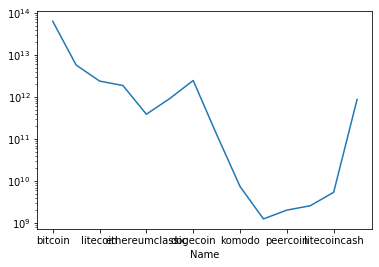

In [17]:
found_data[found_data['annual_energy'] != 0]['annual_energy'].plot()
plt.yscale('log')
plt.show()

## Electricity price estimation

In [18]:
lower_bound = mineable_100[['#','price', 'block_time', 'block_reward']]
lower_bound = lower_bound[~lower_bound.isnull().any(axis=1)].copy()
lower_bound[:4]

,#,price,block_time,block_reward
Name,,,,
bitcoin,1,"$5,300.20",787.0000,13.0872
ethereum,2,$116.80,13.3475,2.0000
litecoin,4,$34.72,156.0000,12.5000
bitcoinsv,5,$119.00,583.0000,12.5000


In [25]:
lower_bound['price'] = lower_bound['price'].str.replace('$','').str.replace(',','').astype(float)

In [26]:
lower_bound['reward_per_sec'] = lower_bound['price']*lower_bound['block_reward']/lower_bound['block_time'] 
lower_bound

,#,price,block_time,block_reward,reward_per_sec
Name,,,,,
bitcoin,1,5300.200000,787.0000,13.087200,88.138218
ethereum,2,116.800000,13.3475,2.000000,17.501405
litecoin,4,34.720000,156.0000,12.500000,2.782051
bitcoinsv,5,119.000000,583.0000,12.500000,2.551458
monero,8,36.340000,120.0000,1.868363,0.565803
ethereumclassic,9,4.610000,13.5743,3.104000,1.054157
dash,10,45.460000,158.0000,1.553313,0.446922
zcash,11,24.900000,75.0000,5.000000,1.660000
dogecoin,12,0.001640,63.0000,10000.000000,0.260317


In [28]:
total_rew_per_sec = np.sum(lower_bound['reward_per_sec'])
total_rew_per_sec

117.62369900402246

In [29]:
annual_rew = total_rew_per_sec*31536000
annual_rew

3709380971.790852

Currently, the average industrial power rate in China is around US$0.084/KwH – somewhere in the middle when compared to the rest of the world

In [30]:
power_rate = 0.084 #$/KwH

In [32]:
energy = annual_rew/power_rate # in KwH
energy

44159297283.22443

In [35]:
energy_TWh = energy/10**9 # in TwH

In [37]:
energy_TWh/total_energy_world_TWh

0.0022641149140291443